In [2]:
import numpy as np
import scipy.stats as sts
import scipy.special as sc
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X=[1.41,9.97,0.28,13.87,11.61,10.93,16.21,15.67,3.62,27.56,5.27,23.70,12.16,20.59,20.01,14.54,0.73 ,8.01 ,-6.80,28.74,8.85 ,20.76,24.17,28.81,14.92,14.71,13.97,18.14,2.21 ,23.46,17.60,4.75 ,6.16 ,18.26,24.47,9.25 ,15.41,8.44 ,29.20,19.62,2.33 ,24.57,11.56,-3.44,12.47,26.37,7.46 ,11.27,14.94,4.26]

In [4]:
m=np.mean(X)
s2=np.var(X,ddof=1)
m_gr=13.6686
s2_gr=76.9072
n=50

In [5]:
dovivl=(m-sts.t(n-1).ppf((1+0.95)/2)*np.sqrt(s2/50),m+sts.t(n-1).ppf((1+0.95)/2)*np.sqrt(s2/50))
dovivl

(10.929887950135736, 15.991312049864263)

In [6]:
dovivl_gr=(m_gr-sts.t(n-1).ppf((1+0.95)/2)*np.sqrt(s2_gr/50),m_gr+sts.t(n-1).ppf((1+0.95)/2)*np.sqrt(s2_gr/50))
dovivl_gr

(11.17628593816449, 16.16091406183551)

In [7]:
X1=np.array([np.random.normal(12,10,(200,1)),np.random.exponential(12,(200,1)),np.random.uniform(2,22,(200,1))])

In [8]:
mx1=[np.mean(x) for x in X1]
mx1

[11.518222663459092, 12.2219512139354, 11.731730197271368]

In [9]:
s2x1=[np.var(x,ddof=1) for x in X1]
s2x1

[96.3705006609612, 117.80028906412241, 36.82773924374398]

In [10]:
np.sqrt(s2x1)

array([ 9.8168478 , 10.85358416,  6.06858626])

[ 3.  5. 31. 55. 67. 33.  6.]


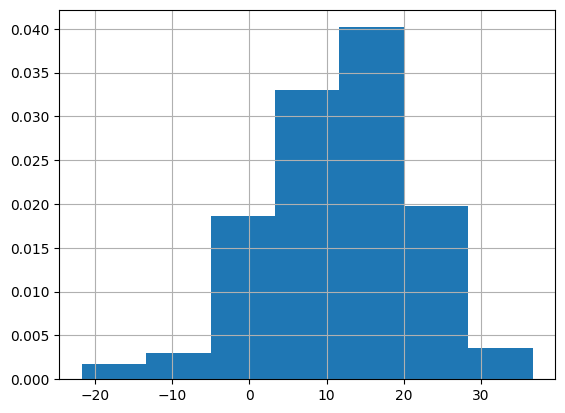

In [82]:
plt.grid()
hist_norm=plt.hist(X1[0],bins=7,density=True)
norm_freq=hist_norm[0]*200*(hist_norm[1][1]-hist_norm[1][0])
print(norm_freq)

In [92]:
norm_ivl=list(hist_norm[1])
norm_ivl=norm_ivl[2:-1]
norm_ivl.insert(0,float('-inf'))
norm_ivl.append(float('inf'))
norm_ivl = list(zip(norm_ivl[:-1],norm_ivl[1:]))
norm_freq=[8,31,55,67,33,6]
print(norm_ivl,'\n',norm_freq)

[(-inf, -5.020665181280826), (-5.020665181280826, 3.316925523154122), (3.316925523154122, 11.65451622758907), (11.65451622758907, 19.992106932024015), (19.992106932024015, 28.329697636458967), (28.329697636458967, inf)] 
 [8, 31, 55, 67, 33, 6]


In [93]:
pnorm=[sts.norm(mx1[0],np.sqrt(s2x1[0])).cdf(i[1])-sts.norm(mx1[0],np.sqrt(s2x1[0])).cdf(i[0]) for i in norm_ivl]
chinorm=sum((n-200*p)**2/(200*p) for n,p in zip(norm_freq,pnorm))
chinorm

2.6013703437060856

In [94]:
sts.chi2(len(norm_ivl)-2-1).ppf(1-0.05)

7.814727903251179

[82. 54. 39. 14.  3.  5.  3.]
[ 0.05465015  7.77080605 15.48696194 23.20311783 30.91927373 38.63542962
 46.35158552 54.06774141]


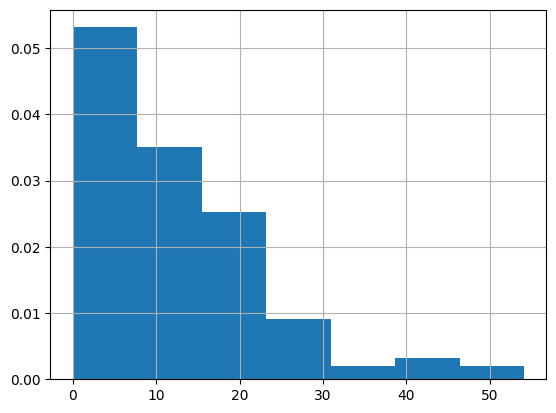

In [96]:
plt.grid()
hist_exp=plt.hist(X1[1],bins=7,density=True)
exp_freq=hist_exp[0]*200*(hist_exp[1][1]-hist_exp[1][0])
print(exp_freq)
print(hist_exp[1])

In [104]:
exp_freq=[82,54,39,17,8]
exp_ivl=list(hist_exp[1])
exp_ivl.pop(4)
exp_ivl.pop(5)
exp_ivl[0]=float('-inf')
exp_ivl[-1]=float('inf')
exp_ivl=list(zip(exp_ivl[0:-1],exp_ivl[1:]))
exp_ivl

[(-inf, 7.770806046449328),
 (7.770806046449328, 15.486961940652327),
 (15.486961940652327, 23.203117834855327),
 (23.203117834855327, 38.635429623261324),
 (38.635429623261324, inf)]

In [114]:
pexp=[sts.expon(0,mx1[1]).cdf(i[1])-sts.expon(0,mx1[1]).cdf(i[0]) for i in exp_ivl]
chiexp=sum((n-200*p)**2/(200*p) for n,p in zip(exp_freq,pexp))
chiexp

8.964907171033293

In [133]:
sts.chi2(len(exp_ivl)-1).ppf(1-0.05)

9.487729036781154

[33. 33. 31. 20. 22. 28. 33.]


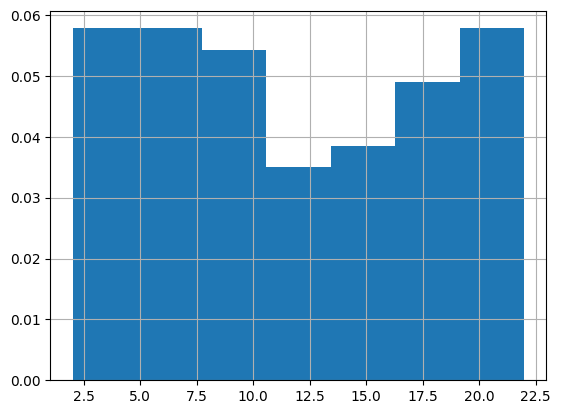

In [120]:
plt.grid()
hist_uni=plt.hist(X1[2],bins=7,density=True)
uni_freq=hist_uni[0]*200*(hist_uni[1][1]-hist_uni[1][0])
print(uni_freq)

In [123]:
uni_ivl=list(hist_uni[1])
uni_ivl[0]=float('-inf')
uni_ivl[-1]=float('inf')
uni_ivl=list(zip(uni_ivl[0:-1],uni_ivl[1:]))
print(uni_ivl)

[(-inf, 4.8787483565592495), (4.8787483565592495, 7.728796467357544), (7.728796467357544, 10.578844578155838), (10.578844578155838, 13.428892688954132), (13.428892688954132, 16.278940799752426), (16.278940799752426, 19.12898891055072), (19.12898891055072, inf)]


In [128]:
puni=[sts.uniform(2,20).cdf(i[1])-sts.uniform(2,20).cdf(i[0]) for i in uni_ivl]
chiuni=sum((n-200*p)**2/(200*p) for n,p in zip(uni_freq,puni))
chiuni

6.213766529830545

In [130]:
sts.chi2(len(uni_ivl)-1).ppf(1-0.05)

12.591587243743977